In [49]:
import numpy as np
import csv

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt

In [6]:
input_file = 'ionosphere.data.txt'

X = np.zeros((351, 34), dtype='float')
y = np.zeros((351,), dtype='bool')

In [9]:
with open(input_file, 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

In [14]:
print(X[0], y[0])

[ 1.       0.       0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708
  1.       0.0376   0.85243 -0.17755  0.59755 -0.44945  0.60536 -0.38223
  0.84356 -0.38542  0.58212 -0.32192  0.56971 -0.29674  0.36946 -0.47357
  0.56811 -0.51171  0.41078 -0.46168  0.21266 -0.3409   0.42267 -0.54487
  0.18641 -0.453  ] True


In [17]:
# Split into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=14)

In [19]:
# Create a new estimator
estimator = KNeighborsClassifier()

In [21]:
# Fit it
estimator.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [31]:
# Predict
y_predicted = estimator.predict(X_test)

# accuracy = np.mean(y_predicted == y_test) * 100
scores = cross_val_score(estimator, X, y, scoring='accuracy')
average_accuracy = np.mean(scores) * 100
print('The accuracy is {:.1f}%'.format(average_accuracy))

The accuracy is 82.3%


In [34]:
# Test the impact of the number of neighbours on the accuracy
avg_scores = []
all_scores = []

parameter_values = list(range(1, 21)) # Max of 20 neighbors
for n in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n)
    scores = cross_val_score(estimator, X, y, scoring='accuracy')
    
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)
print(avg_scores)

[0.83475783475783472, 0.86039886039886049, 0.82905982905982911, 0.83760683760683763, 0.8233618233618234, 0.84045584045584043, 0.80056980056980054, 0.83760683760683763, 0.80911680911680917, 0.83190883190883191, 0.79487179487179482, 0.81481481481481488, 0.80626780626780636, 0.8205128205128206, 0.80056980056980054, 0.81481481481481488, 0.79202279202279202, 0.79772079772079774, 0.7806267806267807, 0.79202279202279202]


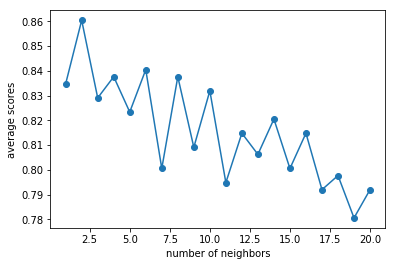

In [46]:
plt.plot(parameter_values, avg_scores, '-o')
plt.xlabel('number of neighbors')
plt.ylabel('average scores')
plt.show()

In [51]:
# The plot shows a decreasing trend as the number of neighbors increases

In [53]:
# Pipeline
scaling_pipeline = Pipeline([('scale', MinMaxScaler()),
                             ('predict', KNeighborsClassifier())])

scores = cross_val_score(scaling_pipeline, X, y, scoring='accuracy')
print('The pipeline average score is {:.1f}%'.format(np.mean(scores) * 100))

The pipeline average score is 82.3%
